# Part II - Ford GoBike System Data

## by Long Le Trung (Brian)


## Investigation Overview

The primary goals of this presentation are:

n this investigation, I wanted to take a look at behavior of Users by durations, age, time, location and how far they go usually.

## Dataset Overview

This dataset serves as a rich resource for understanding how users interact with the bike-sharing service, enabling targeted strategies to enhance user experience and service efficiency.


In [25]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import seaborn as sns
from math import radians, sin, cos, sqrt, atan2

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [26]:
ford_bike_df = pd.read_csv("./resources/bike_cleaned.csv")
ford_bike_df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,location_start,location_end,duration_min,member_age,age_group,day_of_week,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,NaN,NaN,869.750000,40.0,30-40,Thursday,17
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,NaN,NaN,1030.900000,52.0,40-50,Thursday,12
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,NaN,NaN,608.166667,35.0,30-40,Thursday,17
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,NaN,NaN,26.416667,50.0,40-50,Thursday,23
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,NaN,NaN,29.883333,65.0,60+,Thursday,23
5,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,1983.0,Female,No,NaN,NaN,19.116667,41.0,30-40,Thursday,23
6,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,1989.0,Male,No,NaN,NaN,26.916667,35.0,30-40,Thursday,23
7,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,1988.0,Other,No,NaN,NaN,26.166667,36.0,30-40,Thursday,23
8,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,1992.0,Male,No,NaN,NaN,17.483333,32.0,20-30,Thursday,23
9,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,1996.0,Female,Yes,NaN,NaN,7.633333,28.0,20-30,Thursday,23


In [27]:
def calculate_haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    # Radius of Earth in kilometers (use 3956 for miles)
    r = 6371
    distance = r * c
    return distance


ford_bike_df["distance"] = None
ford_bike_df["distance"] = ford_bike_df.apply(
    lambda row: calculate_haversine_distance(
        row["start_station_latitude"],
        row["start_station_longitude"],
        row["end_station_latitude"],
        row["end_station_longitude"],
    ),
    axis=1,
)

In [28]:
if ("location_start" in ford_bike_df.columns) & (
    "location_end" in ford_bike_df.columns
):
    ford_bike_df.drop(columns=["location_start", "location_end"], axis=1, inplace=True)
    ford_bike_df.to_csv("resources/bike_cleaned.csv", index=False)
    ford_bike_df.head()

## (Visualization 1)

Chart below describe Douration by user type and age group


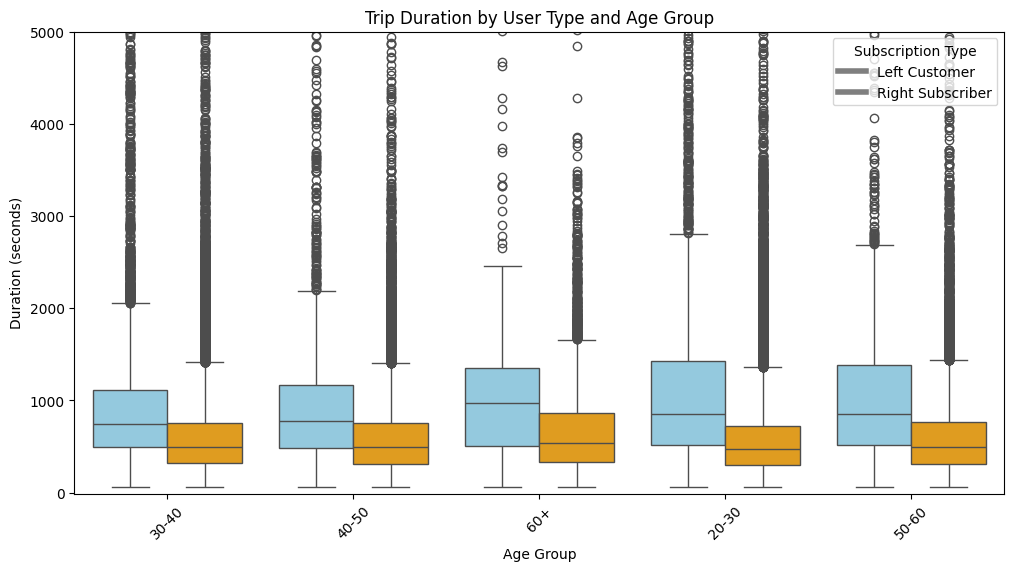

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=ford_bike_df,
    x="age_group",
    y="duration_sec",
    hue="user_type",
    palette={"Customer": "skyblue", "Subscriber": "orange"},
)
plt.title("Trip Duration by User Type and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Duration (seconds)")
plt.xticks(rotation=45)
custom_legend = [
    Line2D([0], [0], color="tab:gray", lw=4, label="Left Customer"),
    Line2D([0], [0], color="tab:gray", lw=4, label="Right Subscriber"),
]
plt.ylim(-10, 5000)
plt.legend(handles=custom_legend, title="Subscription Type", loc="upper right")
plt.show()

# Visualization 2: Average Trip Duration by Age Group

This bar chart displays the average duration of trips (in seconds) segmented by age group.
Each bar represents the mean duration for a specific age category, showing which age groups tend to take longer trips on average.


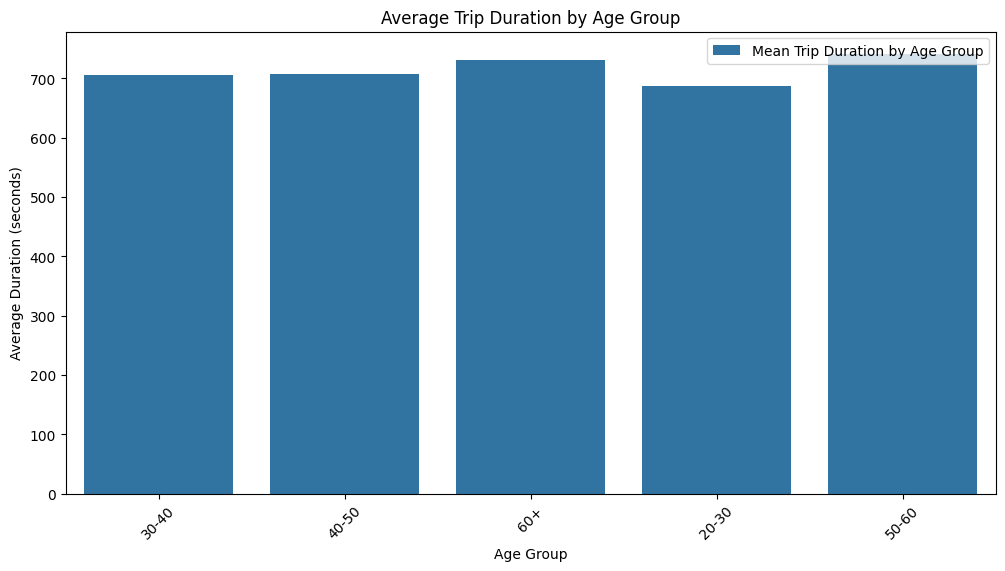

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ford_bike_df, x="age_group", y="duration_sec", estimator="mean", ci=None
)
plt.title("Average Trip Duration by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Duration (seconds)")
plt.xticks(rotation=45)
plt.legend(["Mean Trip Duration by Age Group"], loc="upper right")
plt.show()

## Visualization 3: Trip Distance Distribution

This histogram illustrates the frequency of different trip distances in meters.
The distribution gives insight into common trip lengths, with the majority of trips falling within a specific range. The curve also shows a smoothed probability density, highlighting the most typical distances.


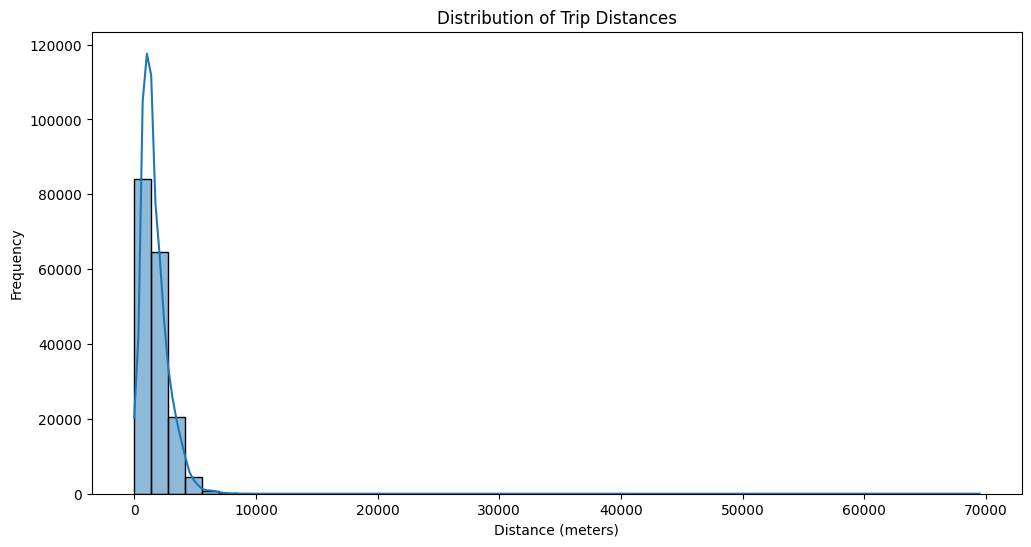

In [31]:
# convert KM to M
distanceConverted = ford_bike_df["distance"].apply(lambda x: x * 1000)
plt.figure(figsize=(12, 6))
sns.histplot(distanceConverted, bins=50, kde=True)
plt.title("Distribution of Trip Distances")
plt.xlabel("Distance (meters)")
plt.ylabel("Frequency")
plt.show()

## Visualization 4: Number of Rides by Time of Day

This count plot shows the distribution of rides throughout each hour of the day.
It provides a clear view of peak and low-activity hours, which can indicate commuter patterns or popular times for bike usage.


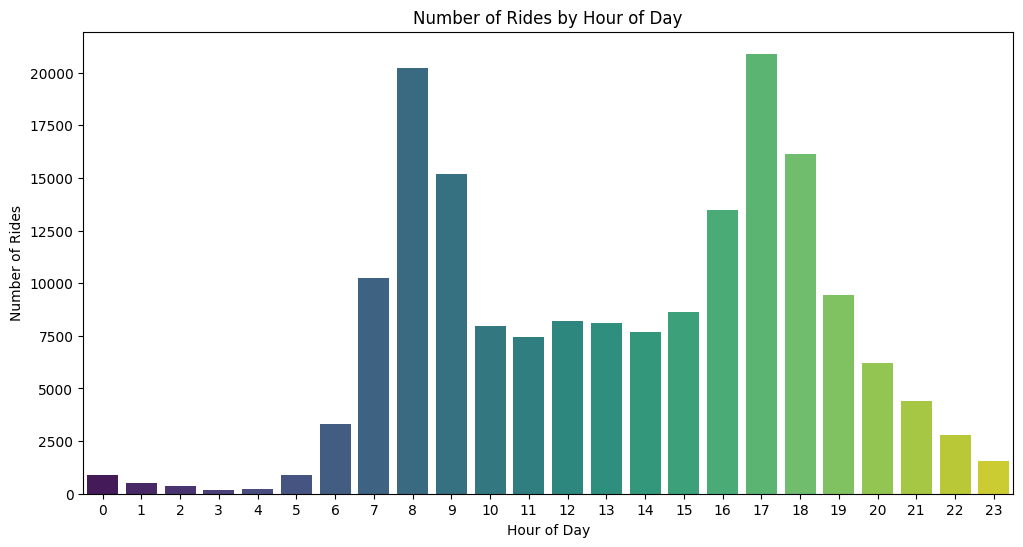

In [32]:
# Convert 'start_time' to datetime and extract hour
ford_bike_df["start_time"] = pd.to_datetime(ford_bike_df["start_time"])
ford_bike_df["start_hour"] = ford_bike_df["start_time"].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(data=ford_bike_df, x="start_hour", palette="viridis")
plt.title("Number of Rides by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.show()

## Visualization 5: Trip Duration by User Type and Age Group

A boxplot comparing trip duration across age groups for both Customer and Subscriber user types.
Each box represents the interquartile range (middle 50% of data) for trip durations within each age group and user type. This plot highlights variations in trip duration and outliers across different user demographics.


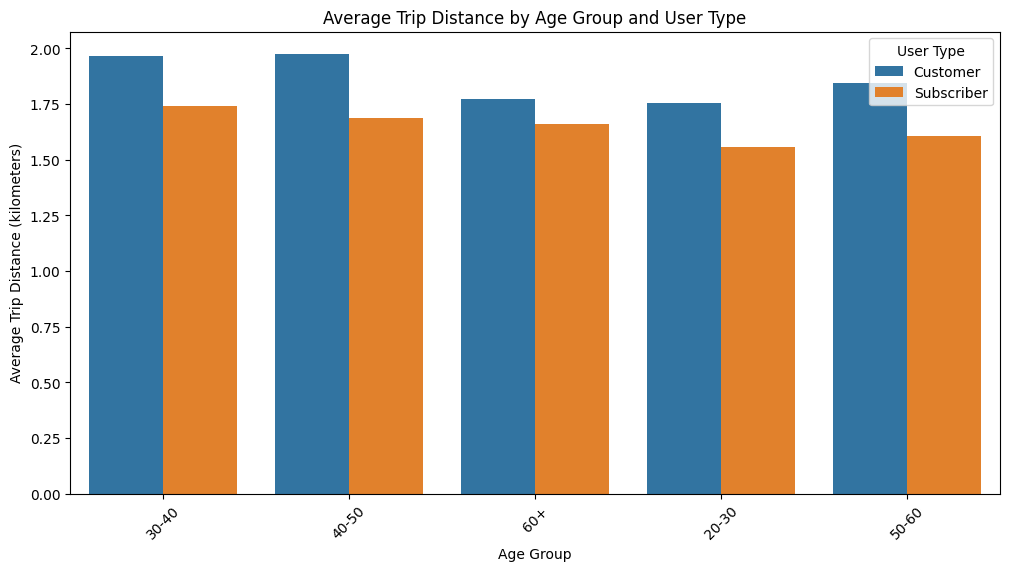

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ford_bike_df,
    x="age_group",
    y="distance",
    hue="user_type",
    estimator="mean",
    ci=None,
)
plt.title("Average Trip Distance by Age Group and User Type")
plt.xlabel("Age Group")
plt.ylabel("Average Trip Distance (kilometers)")
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.show()

In [34]:
# !jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt